## Load libraries

In [1]:
import os
import pandas as pd
import numpy as np
import h5py
from sklearn.metrics import classification_report

from alphai_watson.performance import GANPerformanceAnalysis
from alphai_watson.transformer import NullTransformer
from alphai_rickandmorty_oracle.datasource.mnist import MNISTDataSource
from alphai_rickandmorty_oracle.detective import RickAndMortyDetective
from alphai_rickandmorty_oracle.model_mnist import RickAndMorty

from matplotlib import pyplot as plt

/opt/anaconda/envs/ai/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/opt/anaconda/envs/ai/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
DEBUG:matplotlib:CACHEDIR=/home/ubuntu/.cache/matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /home/ubuntu/.cache/matplotlib/fontList.json
DEBUG:matplotlib.backends:backend agg version v2.2


Enabling weight norm
Uppercase local vars:
	BATCH_SIZE: 50
	CRITIC_ITERS: 5
	DEFAULT_FIT_EPOCHS: 1000
	DEFAULT_LEARN_RATE: 0.0001
	DEFAULT_TRAIN_ITERS: 5000
	DEFAULT_Z_DIM: 200
	DIAGNOSIS_LEARN_RATE: 0.01
	DIM: 64
	DISC_FILTER_SIZE: 5
	INIT_KERNEL: <tensorflow.python.ops.init_ops.RandomNormal object at 0x7f880498be48>
	LAMBDA: 10
	LAMBDA_2: 2.0
	OUTPUT_DIM: 784


## Define MNIST Datasource

In [2]:
file_path = '../../tests/resources'

abnormal_digit = 9

# Train and test data file
train_data_file = os.path.join(file_path, 'mnist_data_train_abnormalclass-{}.hd5'.format(abnormal_digit))
test_data_file = os.path.join(file_path, 'mnist_data_test_abnormalclass-{}.hd5'.format(abnormal_digit))

# Model parameters
n_sensors = 28
n_timesteps = 784 // n_sensors

train_data_source = MNISTDataSource(source_file=train_data_file, 
                                    transformer=NullTransformer(number_of_timesteps=n_timesteps,
                                                                number_of_sensors=n_sensors))
test_data_source = MNISTDataSource(source_file=test_data_file,
                                   transformer=NullTransformer(number_of_timesteps=n_timesteps,
                                                               number_of_sensors=n_sensors))

train_data = train_data_source.get_train_data('NORMAL')

DEBUG:root:Start file parsing.
DEBUG:root:Processing sample type NORMAL.
DEBUG:root:End file parsing.
DEBUG:root:Start file parsing.
DEBUG:root:Processing sample type ABNORMAL.
DEBUG:root:Processing sample type NORMAL.
DEBUG:root:End file parsing.


### Plot input images to verify correctness

DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown
DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/opt/anaconda/envs/ai/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


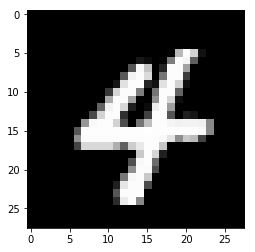

In [3]:
%matplotlib inline
# First row is first image
idx = len(train_data.data)
image = train_data.data[np.random.randint(0, idx)]

# h_train = h5py.File(test_data_file)
# image = np.array(h_train.get('ABNORMAL'))[156]

# 784 columns correspond to 28x28 image
plottable_image = np.reshape(image, (28, 28))

# Plot the image
plt.imshow(plottable_image, cmap='gray')
plt.show()

## Define Model

DEBUG:root:Starting session
DEBUG:root:Start training loop...
INFO:root:Initialising Model
INFO:root:Training iteration 0 of 10000


iter 0	train disc cost	1.3727765083312988	time	0.9271237850189209
iter 1	train disc cost	1.327879548072815	time	0.23893332481384277
iter 2	train disc cost	1.3083566427230835	time	0.1567244529724121
iter 3	train disc cost	1.2761428356170654	time	0.14671730995178223
iter 4	train disc cost	1.2625622749328613	time	0.13574433326721191


INFO:root:Saving fake samples to png.


iter 99	train disc cost	0.3146797716617584	time	0.11887160100434956


INFO:root:Saving fake samples to png.


iter 199	train disc cost	0.0017414398025721312	time	0.111902756690979


INFO:root:Saving fake samples to png.


iter 299	train disc cost	4.299502688809298e-05	time	0.11447509765625


INFO:root:Saving fake samples to png.


iter 399	train disc cost	1.977225110749714e-06	time	0.11637592077255249


INFO:root:Saving fake samples to png.


iter 499	train disc cost	4.931007993036474e-07	time	0.11156626701354981


INFO:root:Saving fake samples to png.


iter 599	train disc cost	1.717810675927467e-07	time	0.1169168734550476


INFO:root:Saving fake samples to png.


iter 699	train disc cost	6.399693575076526e-08	time	0.11489486932754517


INFO:root:Saving fake samples to png.


iter 799	train disc cost	3.953325133920771e-08	time	0.11209239721298218


INFO:root:Saving fake samples to png.


iter 899	train disc cost	3.166617190686338e-08	time	0.11755348443984985


INFO:root:Saving fake samples to png.
INFO:root:Training iteration 1000 of 10000


iter 999	train disc cost	2.8319941520749126e-06	time	0.11359975814819336


INFO:root:Saving fake samples to png.


iter 1099	train disc cost	2.2069622218623408e-07	time	0.11312572240829467


INFO:root:Saving fake samples to png.


iter 1199	train disc cost	1.3885406247027277e-07	time	0.11794940710067749


INFO:root:Saving fake samples to png.


iter 1299	train disc cost	9.053862868313445e-07	time	0.11182382583618164


INFO:root:Saving fake samples to png.


iter 1399	train disc cost	1.310923948949494e-06	time	0.11565391778945923


INFO:root:Saving fake samples to png.


iter 1499	train disc cost	9.720795787870884e-05	time	0.11614933013916015


INFO:root:Saving fake samples to png.


iter 1599	train disc cost	6.1345317590166815e-06	time	0.1117988133430481


INFO:root:Saving fake samples to png.


iter 1699	train disc cost	3.631719300756231e-05	time	0.11681726932525635


INFO:root:Saving fake samples to png.


iter 1799	train disc cost	0.01960109733045101	time	0.1148335599899292


INFO:root:Saving fake samples to png.


iter 1899	train disc cost	0.3065964877605438	time	0.11228252649307251


INFO:root:Saving fake samples to png.
INFO:root:Training iteration 2000 of 10000


iter 1999	train disc cost	0.2304421216249466	time	0.1179557728767395


INFO:root:Saving fake samples to png.


iter 2099	train disc cost	0.14703112840652466	time	0.1131836462020874


INFO:root:Saving fake samples to png.


iter 2199	train disc cost	0.09729167073965073	time	0.11339236974716187


INFO:root:Saving fake samples to png.


iter 2299	train disc cost	0.09052136540412903	time	0.11817880392074585


INFO:root:Saving fake samples to png.


iter 2399	train disc cost	0.13265568017959595	time	0.11139304637908935


INFO:root:Saving fake samples to png.


iter 2499	train disc cost	0.0989360436797142	time	0.11576256513595581


INFO:root:Saving fake samples to png.


iter 2599	train disc cost	0.1249467208981514	time	0.11651671648025513


INFO:root:Saving fake samples to png.


iter 2699	train disc cost	0.10476259887218475	time	0.11240358829498291


INFO:root:Saving fake samples to png.


iter 2799	train disc cost	0.1098376214504242	time	0.11736461400985718


INFO:root:Saving fake samples to png.


iter 2899	train disc cost	0.1279124915599823	time	0.11377572774887085


INFO:root:Saving fake samples to png.
INFO:root:Training iteration 3000 of 10000


iter 2999	train disc cost	0.1806645542383194	time	0.1122798228263855


INFO:root:Saving fake samples to png.


iter 3099	train disc cost	0.20404759049415588	time	0.11831367492675782


INFO:root:Saving fake samples to png.


iter 3199	train disc cost	0.25286799669265747	time	0.11241735458374023


INFO:root:Saving fake samples to png.


iter 3299	train disc cost	0.2662240266799927	time	0.11384110450744629


INFO:root:Saving fake samples to png.


iter 3399	train disc cost	0.3007548451423645	time	0.11710973978042602


INFO:root:Saving fake samples to png.


iter 3499	train disc cost	0.32230252027511597	time	0.11138941526412964


INFO:root:Saving fake samples to png.


iter 3599	train disc cost	0.35017868876457214	time	0.11613558292388916


INFO:root:Saving fake samples to png.


iter 3699	train disc cost	0.3608969449996948	time	0.11532054901123047


INFO:root:Saving fake samples to png.


iter 3799	train disc cost	0.3547443747520447	time	0.1112259554862976


INFO:root:Saving fake samples to png.


iter 3899	train disc cost	0.35342052578926086	time	0.11679861545562745


INFO:root:Saving fake samples to png.
INFO:root:Training iteration 4000 of 10000


iter 3999	train disc cost	0.3485995829105377	time	0.1126617169380188


INFO:root:Saving fake samples to png.


iter 4099	train disc cost	0.34507930278778076	time	0.11208934545516967


INFO:root:Saving fake samples to png.


iter 4199	train disc cost	0.32068076729774475	time	0.11814196109771728


INFO:root:Saving fake samples to png.


iter 4299	train disc cost	0.3485414981842041	time	0.1113052487373352


INFO:root:Saving fake samples to png.


iter 4399	train disc cost	0.3175503611564636	time	0.11357087373733521


INFO:root:Saving fake samples to png.


iter 4499	train disc cost	0.32751837372779846	time	0.11620528697967529


INFO:root:Saving fake samples to png.


iter 4599	train disc cost	0.3343692421913147	time	0.11087578058242797


INFO:root:Saving fake samples to png.


iter 4699	train disc cost	0.30842089653015137	time	0.1158244776725769


INFO:root:Saving fake samples to png.


iter 4799	train disc cost	0.31403306126594543	time	0.11409241437911988


INFO:root:Saving fake samples to png.


iter 4899	train disc cost	0.3024737536907196	time	0.11084436655044555


INFO:root:Saving fake samples to png.
INFO:root:Training iteration 5000 of 10000


iter 4999	train disc cost	0.3032083213329315	time	0.11682137727737427


INFO:root:Saving fake samples to png.


iter 5099	train disc cost	0.29291895031929016	time	0.11231902837753296


INFO:root:Saving fake samples to png.


iter 5199	train disc cost	0.29153239727020264	time	0.11205158472061157


INFO:root:Saving fake samples to png.


iter 5299	train disc cost	0.2713731527328491	time	0.11763726711273194


INFO:root:Saving fake samples to png.


iter 5399	train disc cost	0.2721523642539978	time	0.1106017780303955


INFO:root:Saving fake samples to png.


iter 5499	train disc cost	0.30389392375946045	time	0.11300210237503051


INFO:root:Saving fake samples to png.


iter 5599	train disc cost	0.2757481634616852	time	0.11576358318328857


INFO:root:Saving fake samples to png.


iter 5699	train disc cost	0.27879172563552856	time	0.11025146007537842


INFO:root:Saving fake samples to png.


iter 5799	train disc cost	0.27393460273742676	time	0.11545215845108033


INFO:root:Saving fake samples to png.


iter 5899	train disc cost	0.2706914246082306	time	0.11312665939331054


INFO:root:Saving fake samples to png.
INFO:root:Training iteration 6000 of 10000


iter 5999	train disc cost	0.2660302519798279	time	0.11040063381195069


INFO:root:Saving fake samples to png.


iter 6099	train disc cost	0.25711971521377563	time	0.1163491415977478


INFO:root:Saving fake samples to png.


iter 6199	train disc cost	0.2701500654220581	time	0.11149622440338135


INFO:root:Saving fake samples to png.


iter 6299	train disc cost	0.27128857374191284	time	0.11183514833450317


INFO:root:Saving fake samples to png.


iter 6399	train disc cost	0.2655472159385681	time	0.1166969895362854


INFO:root:Saving fake samples to png.


iter 6499	train disc cost	0.2630103528499603	time	0.11036545038223267


INFO:root:Saving fake samples to png.


iter 6599	train disc cost	0.252618670463562	time	0.11402322292327881


INFO:root:Saving fake samples to png.


iter 6699	train disc cost	0.25433608889579773	time	0.11465655088424682


INFO:root:Saving fake samples to png.


iter 6799	train disc cost	0.2515408396720886	time	0.10999540567398071


INFO:root:Saving fake samples to png.


iter 6899	train disc cost	0.23561817407608032	time	0.11577192783355712


INFO:root:Saving fake samples to png.
INFO:root:Training iteration 7000 of 10000


iter 6999	train disc cost	0.23145431280136108	time	0.11307170629501342


INFO:root:Saving fake samples to png.


iter 7099	train disc cost	0.2294156700372696	time	0.11022693872451782


INFO:root:Saving fake samples to png.


iter 7199	train disc cost	0.2273557484149933	time	0.11664494276046752


INFO:root:Saving fake samples to png.


iter 7299	train disc cost	0.23799414932727814	time	0.11117464780807496


INFO:root:Saving fake samples to png.


iter 7399	train disc cost	0.2286086231470108	time	0.11210269212722779


INFO:root:Saving fake samples to png.


iter 7499	train disc cost	0.21048308908939362	time	0.11600975275039672


INFO:root:Saving fake samples to png.


iter 7599	train disc cost	0.22886739671230316	time	0.11023184299468994


INFO:root:Saving fake samples to png.


iter 7699	train disc cost	0.22303882241249084	time	0.11419387340545654


INFO:root:Saving fake samples to png.


iter 7799	train disc cost	0.2237929105758667	time	0.11412321329116822


INFO:root:Saving fake samples to png.


iter 7899	train disc cost	0.2357759028673172	time	0.11016256809234619


INFO:root:Saving fake samples to png.
INFO:root:Training iteration 8000 of 10000


iter 7999	train disc cost	0.2114959955215454	time	0.11496890544891357


INFO:root:Saving fake samples to png.


iter 8099	train disc cost	0.20743119716644287	time	0.11219319105148315


INFO:root:Saving fake samples to png.


iter 8199	train disc cost	0.20982597768306732	time	0.11093382120132446


INFO:root:Saving fake samples to png.


iter 8299	train disc cost	0.22058790922164917	time	0.11616380453109741


INFO:root:Saving fake samples to png.


iter 8399	train disc cost	0.20377935469150543	time	0.11131592750549317


INFO:root:Saving fake samples to png.


iter 8499	train disc cost	0.21073657274246216	time	0.11251938343048096


INFO:root:Saving fake samples to png.


iter 8599	train disc cost	0.2052069902420044	time	0.1154499626159668


INFO:root:Saving fake samples to png.


iter 8699	train disc cost	0.19652670621871948	time	0.11001261711120605


INFO:root:Saving fake samples to png.


iter 8799	train disc cost	0.19974558055400848	time	0.11513033628463745


INFO:root:Saving fake samples to png.


iter 8899	train disc cost	0.18666307628154755	time	0.11365098237991333


INFO:root:Saving fake samples to png.
INFO:root:Training iteration 9000 of 10000


iter 8999	train disc cost	0.18626375496387482	time	0.11028548955917358


INFO:root:Saving fake samples to png.


iter 9099	train disc cost	0.1825942099094391	time	0.11554478883743285


INFO:root:Saving fake samples to png.


iter 9199	train disc cost	0.17908816039562225	time	0.11189486980438232


INFO:root:Saving fake samples to png.


iter 9299	train disc cost	0.16960492730140686	time	0.11077775716781617


INFO:root:Saving fake samples to png.


iter 9399	train disc cost	0.18889065086841583	time	0.11692132472991944


INFO:root:Saving fake samples to png.


iter 9499	train disc cost	0.18045854568481445	time	0.11040913820266723


INFO:root:Saving fake samples to png.


iter 9599	train disc cost	0.17441606521606445	time	0.11269658088684081


INFO:root:Saving fake samples to png.


iter 9699	train disc cost	0.17334483563899994	time	0.11536216735839844


INFO:root:Saving fake samples to png.


iter 9799	train disc cost	0.16050630807876587	time	0.11007485628128051


INFO:root:Saving fake samples to png.


iter 9899	train disc cost	0.18361541628837585	time	0.11473610877990723


INFO:root:Saving fake samples to png.
DEBUG:root:Training complete.


iter 9999	train disc cost	0.17421089112758636	time	0.11275416851043701


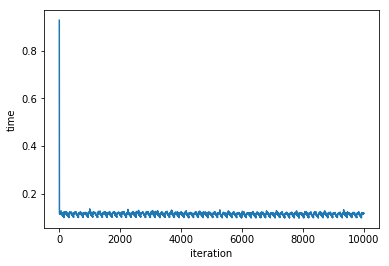

In [4]:
model_dir = './mnist_models'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

batch_size = 64
output_dimensions = 784
train_iters = 10000
plot_save_path = model_dir

model = RickAndMorty(batch_size=batch_size, 
                     output_dimensions=output_dimensions, 
                     train_iters=train_iters,
                     plot_save_path=plot_save_path)

detective = RickAndMortyDetective(model_configuration={
    'model': model,
    'batch_size': batch_size,
    'output_dimensions': output_dimensions,
    'train_iters': train_iters,
    'save_path' : '{}/MNIST-abnormalclass-{}'.format(model_dir, abnormal_digit),
    'plot_save_path' : plot_save_path
})

detective.train(train_data)

## Evaluate Results

### Load trained model

In [5]:
# detective = RickAndMortyDetective(model_configuration={
#     'model': model,
#     'batch_size': batch_size,
#     'output_dimensions': output_dimensions,
#     'train_iters': train_iters,
#     'load_path' : '{}/MNIST-abnormalclass-{}'.format(model_dir, abnormal_digit),
#     'plot_save_path' : plot_save_path
# })

### Load test data


In [6]:
# Get test data
test_data_normal = test_data_source.get_train_data('NORMAL')
test_data_abnormal = test_data_source.get_train_data('ABNORMAL')
test_data = test_data_source.get_train_data('ALL')

# Ground truth for ABNORMAL data is 0, ground truth for NORMAL data is 1
n1 = np.zeros(len(test_data_abnormal.data))
n2 = np.ones(len(test_data_normal.data))
expected_truth = np.hstack((n1, n2))

### Calculate ROC Score

In [7]:
detection_result = detective.detect(test_data)

roc_score = GANPerformanceAnalysis({}).analyse(
  detection_result=detection_result.data,
  expected_truth=expected_truth
)

print('ROC Score: {}'.format(roc_score))

INFO:root:Running detector on <alphai_watson.datasource.Sample object at 0x7f877f1b0be0>
INFO:root:Detection completed in 0.733886132016778


ROC Score: 0.8690227482520858


### Generate classification report

In [11]:
train_results = detective.detect(train_data).data
threshold = np.mean(train_results)
prediction = [1 if x >= threshold else 0 for x in detection_result.data]

target_names = ['ABNORMAL', 'NORMAL']
print(classification_report(expected_truth, prediction, target_names=target_names))

INFO:root:Running detector on <alphai_watson.datasource.Sample object at 0x7f8802e3cb38>
INFO:root:Detection completed in 1.6282928995788097


              precision    recall  f1-score   support

    ABNORMAL       0.55      0.86      0.67      6958
      NORMAL       0.89      0.61      0.72     12609

   micro avg       0.70      0.70      0.70     19567
   macro avg       0.72      0.74      0.70     19567
weighted avg       0.77      0.70      0.70     19567

